# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Loading Data

In [2]:
df=pd.read_csv('machine.csv')

In [3]:
df.head()

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [4]:
df.tail()

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47
208,wang,vs-90,480,1000,4000,0,0,0,45,25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   vendor name  209 non-null    object
 1   Model Name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [6]:
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


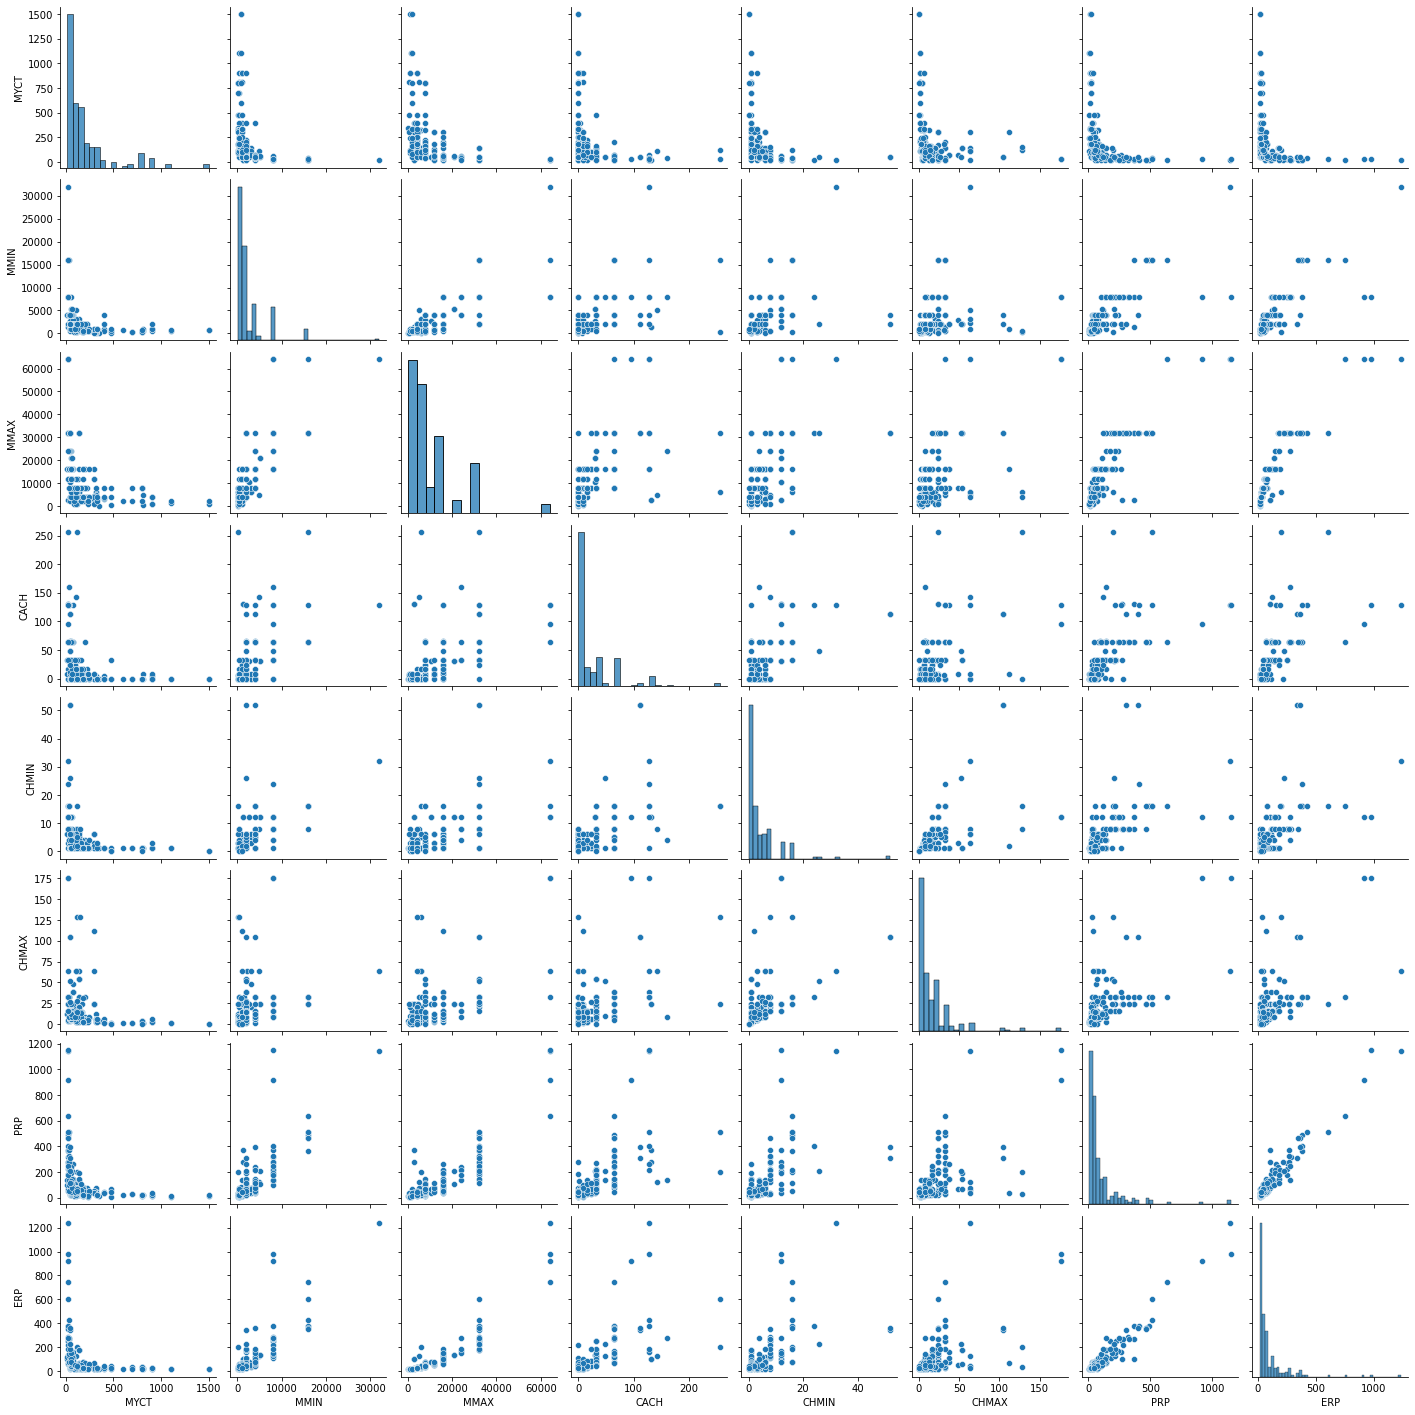

In [7]:
sns.pairplot(df)

In [8]:
corr_matrix=df.corr()

In [9]:
corr_matrix['PRP'].sort_values(ascending=False)

PRP      1.000000
ERP      0.966472
MMAX     0.863004
MMIN     0.794931
CACH     0.662641
CHMIN    0.608903
CHMAX    0.605209
MYCT    -0.307099
Name: PRP, dtype: float64

# selecting features

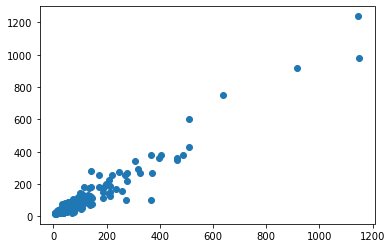

In [10]:
plt.scatter(x=df['PRP'],y=df['ERP'])


In [11]:
df=df[['ERP','PRP']]

# Train Test Split

In [12]:
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

In [13]:
train_set.shape

(167, 2)

In [14]:
test_set.shape

(42, 2)

# Split Feature in Four set

In [15]:
x_train=np.array(train_set[['ERP']])
y_train=np.array(train_set[['ERP']])
x_test=np.array(test_set[['PRP']])
y_test=np.array(test_set[['PRP']])

# Linear Regression

In [16]:
modelLinear=LinearRegression()

In [17]:
modelLinear.fit(x_train,y_train)

LinearRegression()

In [18]:
y_predLinear=modelLinear.predict(x_test)

# R2_Score 

In [19]:
RLinear=r2_score(y_test,y_predLinear)

In [20]:
RLinear

1.0

# Mean_Square_Error

In [21]:
MSELinear=mean_squared_error(y_test,y_predLinear)

In [22]:
MSELinear

3.203075793637392e-27

# Mean_Absolute_Error

In [23]:
MAELinear=mean_absolute_error(y_test,y_predLinear)

In [24]:
MAELinear

2.5291937856222612e-14

# Decision Tree Regression

In [25]:
modelTree=DecisionTreeRegressor()


In [26]:
modelTree.fit(x_train,y_train)

DecisionTreeRegressor()

In [27]:
y_predTree=modelTree.predict(x_test)

# R2_Score 

In [28]:
RTree=r2_score(y_test,y_predTree)

In [29]:
RTree

0.9840296551583826

# Mean_Square_Error

In [30]:
MSETree=mean_squared_error(y_test,y_predTree)

In [31]:
MSETree

813.0

# Mean_Absolute_Error

In [32]:
MAETree=mean_absolute_error(y_test,y_predTree)

In [33]:
MAETree

8.380952380952381

#  Random Forest Regression

In [34]:
modelEnsemble=RandomForestRegressor()

In [35]:
modelEnsemble.fit(x_train,y_train)

C:\Users\Aniket\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [36]:
y_predEnsemble=modelEnsemble.predict(x_test)

# R2_Score 

In [37]:
REnsemble=r2_score(y_test,y_predTree)

In [38]:
REnsemble

0.9840296551583826

# Mean_Square_Error

In [39]:
MSEEnsemble=mean_squared_error(y_test,y_predTree)

In [40]:
MSEEnsemble

813.0

# Mean_Absolute_Error

In [41]:
MAEEnsemble=mean_absolute_error(y_test,y_predTree)

In [42]:
MAEEnsemble

8.380952380952381

# Best Fit Line 

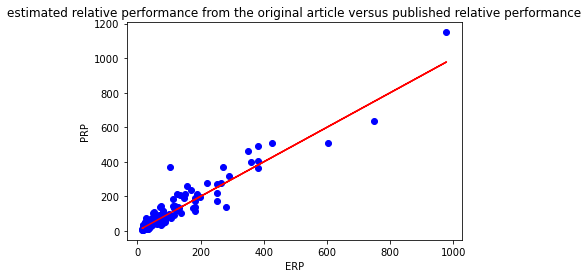

In [43]:
plt.scatter(train_set['ERP'],train_set['PRP'],color='blue')
plt.plot(x_train,modelLinear.coef_*x_train+modelLinear.intercept_,'r')
plt.xlabel('ERP')
plt.ylabel('PRP')
plt.title('estimated relative performance from the original article versus published relative performance')
plt.show()

# saving Model

In [44]:
from joblib import dump,load

In [45]:
dump(modelLinear,'Computer_Hardware_Linear.joblib')

['Computer_Hardware_Linear.joblib']

In [46]:
dump(modelTree,'Computer_Hardware_Tree.joblib')

['Computer_Hardware_Tree.joblib']

In [47]:
dump(modelEnsemble,'Computer_Hardware_Ensemble.joblib')

['Computer_Hardware_Ensemble.joblib']